In [21]:
%load_ext autoreload
%autoreload 2
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [ ]:

import os 
os.chdir("..")

In [97]:

from numerics.integration.steps import *
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from numerics.utilities.misc import *

In [122]:
pars = give_def_params_discrimination(h1true=1)
params, exp_path = check_params(pars)
times, l0, l1, states, states1, signals, covs, covs1 = load_data_discrimination(exp_path = exp_path, periods = 2, ppp=100000, itraj=2)

ep0 = 1e-30
ep1 = 1e-30
b = lambda ep1: np.log((1-ep1)/ep1)
a = lambda ep0: np.log(ep0/(1-ep0))

log_lik_ratio = l0-l1

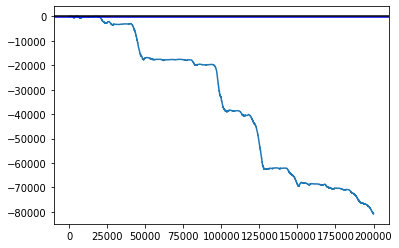

In [123]:
ax = plt.subplot(111)
bb=len(log_lik_ratio)
ax.plot(log_lik_ratio[:-1])
ax.axhline(a(ep0), color="blue")
ax.axhline(b(ep1), color="black")

In [129]:
def stop_time(itraj):
    pars = give_def_params_discrimination(h1true=1)
    params, exp_path = check_params(pars)
    times, l0, l1, states, states1, signals, covs, covs1 = load_data_discrimination(exp_path = exp_path, periods = 2, ppp=100000,itraj=itraj)
    log_lik_ratio = l0-l1
    return times[np.argmin(np.logical_and(log_lik_ratio <= b(ep1), a(ep0) <= log_lik_ratio))]

In [146]:
st = []
for itraj in range(1000):
    try:
        st.append(stop_time(itraj))
    except Exception:
        pass

(array([ 7.3815236 , 14.76304719,  3.6907618 ,  7.38152566, 18.45380382,
        40.59839115, 77.50601947, 47.97991682, 44.28912917, 51.6706507 ,
        40.59836841, 29.5261192 , 36.90760764, 36.90760764, 25.8353543 ,
        18.45380382,  7.3815298 , 18.45380382, 11.07228229, 11.07228229,
         7.38152153,  7.38152153,  3.69076904,  7.38152153, 11.07228229,
         3.69076076,  0.        ,  3.69076076,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  3.69076904,  0.        ,  3.69076904]),
 array([0.00355   , 0.00521225, 0.0068745 , 0.00853675, 0.010199  ,
        0.01186125, 0.0135235 , 0.01518575, 0.016848  , 0.01851025,
        0.0201725 , 0.02183475, 0.023497  , 0.02515925, 0.0268215 ,
        0.02848375, 0.030146  , 0.03180825, 0.0334705 , 0.03513275,
        0.036795  , 0.03845725, 0.0401195 , 0.04178175, 0.043444  ,
        0.04510625, 0.0467685 , 0.04843075, 0.050093  , 0.05175525,
      

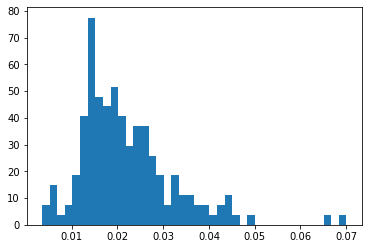

In [147]:
plt.hist(st, bins=int(len(st)/4),  density=True)

In [132]:
def giulio_prob(t, kappa0, kappa1, eta0 , eta1, n0, n1, gamma0, gamma1):
    Su1 = n1 + 1 / 2 + (kappa1 / gamma1)
    Su0 = n0 + 1 / 2 + (kappa0 / gamma0)

    S1 = (np.sqrt(1 + 16.0 * eta1 * kappa1 * Su1 / gamma1) - 1) * gamma1 / (8.0 * eta1 * kappa1)
    S0 = (np.sqrt(1 + 16.0 * eta0 * kappa0 * Su0 / gamma0) - 1) * gamma0 / (8.0 * eta0 * kappa0)

    lam = gamma0 + 8.0 * eta0 * kappa0 * S0

    a = (4*eta1*kappa1*(S1**2))/gamma1
    b =(4*eta0*kappa0 * S0**2) * (1 + ((16.0 * eta1 * kappa1 * S1) / (gamma1 + lam)) + (64.0 * (eta1 * kappa1 * S1)**(2) / (gamma1 * (gamma1 + lam))))/ lam
    c =8 *(S0*S1*(eta0*kappa0 *eta1*kappa1)**(0.5)) * (gamma1+ (4.0*eta1*kappa1*S1) ) / ((gamma1 + lam)*gamma1)

    mu = 4*(eta1*kappa1*a + (eta0*kappa0*b) - 2* np.sqrt(eta1*kappa1*eta0*kappa0)*c)
    S=  np.sqrt(2*mu)

    return b*np.exp(-((b-mu*t)**2)/(2*t*S**2))/(t**(3/2)*np.sqrt(2*np.pi)*S)

In [148]:
[gamma0, omega0, n0, eta0, kappa0], [gamma1, omega1, n1, eta1, kappa1] = params
gp0 = [giulio_prob(t, kappa0, kappa1, eta0, eta1, n0, n1, gamma0,gamma1) for t in times]

pars = give_def_params_discrimination(h1true=1)
params, exp_path = check_params(pars)
[gamma0, omega0, n0, eta0, kappa0], [gamma1, omega1, n1, eta1, kappa1] = params

gp1 = [giulio_prob(t, kappa0, kappa1, eta0 , eta1, n0, n1, gamma0, gamma1) for t in times]

/tmp/ipykernel_136570/2407918517.py:17: RuntimeWarning: divide by zero encountered in double_scalars
  return b*np.exp(-((b-mu*t)**2)/(2*t*S**2))/(t**(3/2)*np.sqrt(2*np.pi)*S)
/tmp/ipykernel_136570/2407918517.py:17: RuntimeWarning: invalid value encountered in double_scalars
  return b*np.exp(-((b-mu*t)**2)/(2*t*S**2))/(t**(3/2)*np.sqrt(2*np.pi)*S)


In [149]:
gp1

[nan,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0

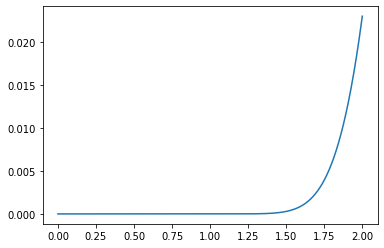

In [144]:
#plt.plot(times, gp)
plt.plot(times, gp1)

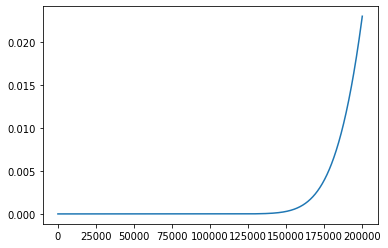

In [141]:
plt.plot(gp0)

In [40]:
alpha = 0
beta = 0

for itraj in tqdm(range(1,10)):

    pars = give_def_params_discrimination(h1true=1)
    params, exp_path = check_params(pars)
    
    times, l0, l1, states, states1, signals, covs, covs1 = load_data(exp_path = exp_path, periods = 50, ppp=1000, itraj=itraj)
    log_lik_ratio = l0-l1

    bools = np.logical_and(log_lik_ratio <= b(ep1), a(ep0) <= log_lik_ratio)
    indi = np.argmin(bools)

    h1 = log_lik_ratio[indi] >= b(ep1)
    h0 = log_lik_ratio[indi] <= a(ep0)
    
    alpha += h0

  0%|                                                                                                                                                         | 0/9 [00:00<?, ?it/s]


FileNotFoundError: [Errno 2] No such file or directory: '../quantera/trajectories/discrimination/[[1.0, 0, 20, 1.0, 1.0], [0.3, 0, 2, 1.0, 1.0]]/1itraj/rossler_real_traj_method/50periods/1000ppp/1rppp/states.npy'